# Setup YouTube Data API Key
https://developers.google.com/youtube/v3/getting-started  
Get your key and enter it into Colab's Secrets store.

In [4]:
from google.colab import userdata
YOUTUBE_DATA_API_KEY = userdata.get('YOUTUBE_DATA_API_KEY')

In [5]:
# Colab already has google libraries installed
# Reference: https://developers.google.com/youtube/v3/quickstart/python
# %pip install --upgrade google-api-python-client
# %pip install --upgrade google-auth-oauthlib google-auth-httplib2

In [6]:
# YouTube Data API
import googleapiclient.discovery

# For displaying videos in Colab
from IPython.display import YouTubeVideo

# Functions to Search YouTube

In [16]:
youtube = googleapiclient.discovery.build(serviceName='youtube', version='v3', developerKey=YOUTUBE_DATA_API_KEY)

def search_yt(query, max_results=5, page_token=None):

    # Reference: https://developers.google.com/youtube/v3/docs/search/list
    # Reference: https://developers.google.com/youtube/v3/guides/implementation/pagination
    request = youtube.search().list(
        part="snippet", # search by keyword
        maxResults=max_results,
        pageToken=page_token, # optional, for going to next/prev result page
        q=query,
        videoCaption='closedCaption', # only include videos with captions
        type='video',   # only include videos, not playlists/channels
    )
    response = request.execute()
    search_response = Search_Response(response)
    return search_response

# Display YouTube search results
def display_yt_results(search_response):
  for search_result in search_response.search_results:
      print(f'Video ID: {search_result.video_id}')
      print(f'Title: {search_result.title}')
      youtube_video = YouTubeVideo(search_result.video_id)
      display(youtube_video)
      print()

# Search Response / Results Classes
Classes to extract data from JSON objects.

In [8]:
'''
Search Response JSON
https://developers.google.com/youtube/v3/docs/videos/list#response
{
    "kind": "youtube#searchListResponse",
    "etag": etag,
    "nextPageToken": string,
    "prevPageToken": string,
    "regionCode": string,
    "pageInfo": {
        "totalResults": integer,
        "resultsPerPage": integer
    },
    "items": [
        search Resource
    ]
}
'''
class Search_Response:
    def __init__(self, search_response) -> None:
        self.prev_page_token = search_response.get('prevPageToken')
        self.next_page_token = search_response.get('nextPageToken')

        # items element contain list of videos
        items = search_response.get('items')

        self.search_results = []
        for item in items:
            search_result = Search_Result(item)
            self.search_results.append(search_result)

'''
Search Results JSON
https://developers.google.com/youtube/v3/docs/search#resource
{
    "kind": "youtube#searchResult",
    "etag": etag,
    "id": {
        "kind": string,
        "videoId": string,
        "channelId": string,
        "playlistId": string
    },
    "snippet": {
        "publishedAt": datetime,
        "channelId": string,
        "title": string,
        "description": string,
        "thumbnails": {
          (key): {
              "url": string,
              "width": unsigned integer,
              "height": unsigned integer
          }
        },
        "channelTitle": string,
        "liveBroadcastContent": string
    }
}
'''
class Search_Result:
    def __init__(self, search_result) -> None:
        self.video_id=     search_result['id']['videoId']
        self.title=        search_result['snippet']['title']
        self.description=  search_result['snippet']['description']
        self.thumbnails=   search_result['snippet']['thumbnails']['default']['url']


# Search YouTube and Display Results

In [ ]:
# Search YouTube and display results
search_response = search_yt('egg recipes')
display_yt_results(search_response)

Video ID: 9CneHYZEYlg
Title: Egg toast | Egg sandwich | Egg cheese sandwich | MOST DELICIOUS + EASY breakfast recipe!!


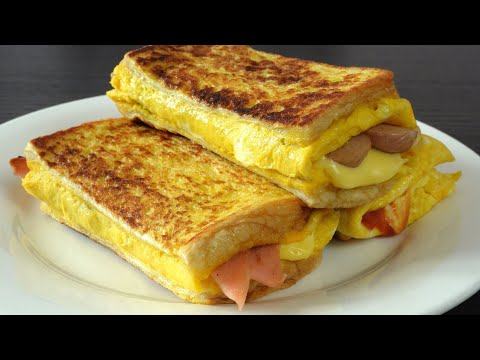

In [15]:
# Go to next page
search_response = search_yt('egg recipes', page_token=search_response.next_page_token)
display_yt_results(search_response)